In [6]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

## Linguistic annotations

In [1]:
import spacy

spacy.prefer_gpu()

# LOADING PIPELINES
nlp = spacy.load("en_core_web_sm")


# Linguistic annotations
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)


Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


## Tokenization
During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)


Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


## Part-of-speech tags and dependencies 

After tokenization, spaCy can parse and tag a given Doc. This is where the trained pipeline and its statistical models come in, which enable spaCy to make predictions of which tag or label most likely applies in this context. A trained component includes binary data that is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following “the” in English is most likely a noun.

Linguistic annotations are available as Token attributes. Like many NLP libraries, spaCy encodes all strings to hash values to reduce memory usage and improve efficiency. So to get the readable string representation of an attribute, we need to add an underscore _ to its name:



In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


Using spaCy’s built-in displaCy visualizer, here’s what our example sentence and its dependencies look like:

In [9]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
#displacy.serve(doc, style="dep")

In [10]:
# Choose an available port number (e.g., 8080)
port = 8081
displacy.serve(doc, style="dep", port=port)

/Users/awf/.pyenv/versions/3.10.13/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:8081 ...



127.0.0.1 - - [17/Jun/2024 09:59:34] "GET / HTTP/1.1" 200 9242
127.0.0.1 - - [17/Jun/2024 09:59:35] "GET /favicon.ico HTTP/1.1" 200 9242


Shutting down server on port 8081.


In [12]:
port = 8081
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.serve(doc, style="dep", port=port, options=options)


Using the 'dep' visualizer
Serving on http://0.0.0.0:8081 ...



127.0.0.1 - - [17/Jun/2024 10:02:35] "GET / HTTP/1.1" 200 9241
127.0.0.1 - - [17/Jun/2024 10:02:35] "GET /favicon.ico HTTP/1.1" 200 9241


Shutting down server on port 8081.


## Named Entities 

A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on your use case.

Named entities are available as the ents property of a Doc:

In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [14]:
import spacy
from spacy import displacy

text = "Apple is looking at buying U.K. startup for $1 billion"

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

displacy.serve(doc, style="ent", port=port)


Using the 'ent' visualizer
Serving on http://0.0.0.0:8081 ...



127.0.0.1 - - [17/Jun/2024 10:04:49] "GET / HTTP/1.1" 200 1378


Shutting down server on port 8081.


In [15]:
port=8081
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.serve(doc, style="ent", port=port, options=options)


Using the 'ent' visualizer
Serving on http://0.0.0.0:8081 ...

Shutting down server on port 8081.


## Word vectors and similarity

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like `word2vec` and usually look like this:

In [22]:
#- python -m spacy download en_core_web_sm
# + python -m spacy download en_core_web_lg

#!python -m spacy download en_core_web_lg

#!python -m spacy download en_core_web_sm

In [23]:
import spacy

nlp = spacy.load("en_core_web_sm")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 6.814786 True
cat True 7.3709016 True
banana True 7.6460695 True
afskfsd True 7.192256 True


In [25]:
import spacy

#nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
nlp = spacy.load("en_core_web_sm")
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))


I like salty fries and hamburgers. <-> Fast food tastes very good. 0.36760004863009244
salty fries <-> hamburgers 0.43338850140571594


/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_43779/3681558174.py:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1, "<->", doc2, doc1.similarity(doc2))
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_43779/3681558174.py:13: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors an

## Pipelines

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.
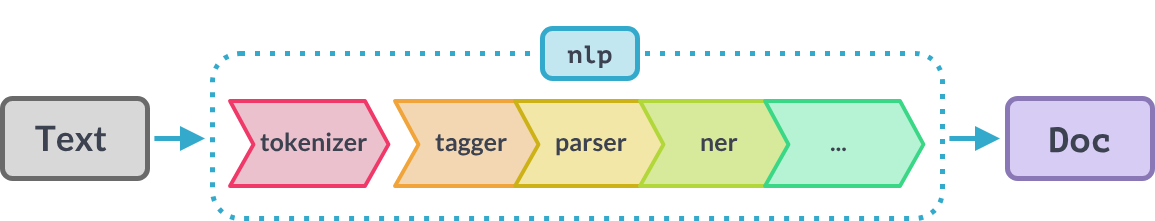

## Architecture
The central data structures in spaCy are the Language class, the Vocab and the Doc object. The Language class is used to process a text and turn it into a Doc object. It’s typically stored as a variable called nlp. The Doc object owns the sequence of tokens and all their annotations. By centralizing strings, word vectors and lexical attributes in the Vocab, we avoid storing multiple copies of this data. This saves memory, and ensures there’s a single source of truth.

Text annotations are also designed to allow a single source of truth: the Doc object owns the data, and Span and Token are views that point into it. The Doc object is constructed by the Tokenizer, and then modified in place by the components of the pipeline. The Language object coordinates these components. It takes raw text and sends it through the pipeline, returning an annotated document. It also orchestrates training and serialization.

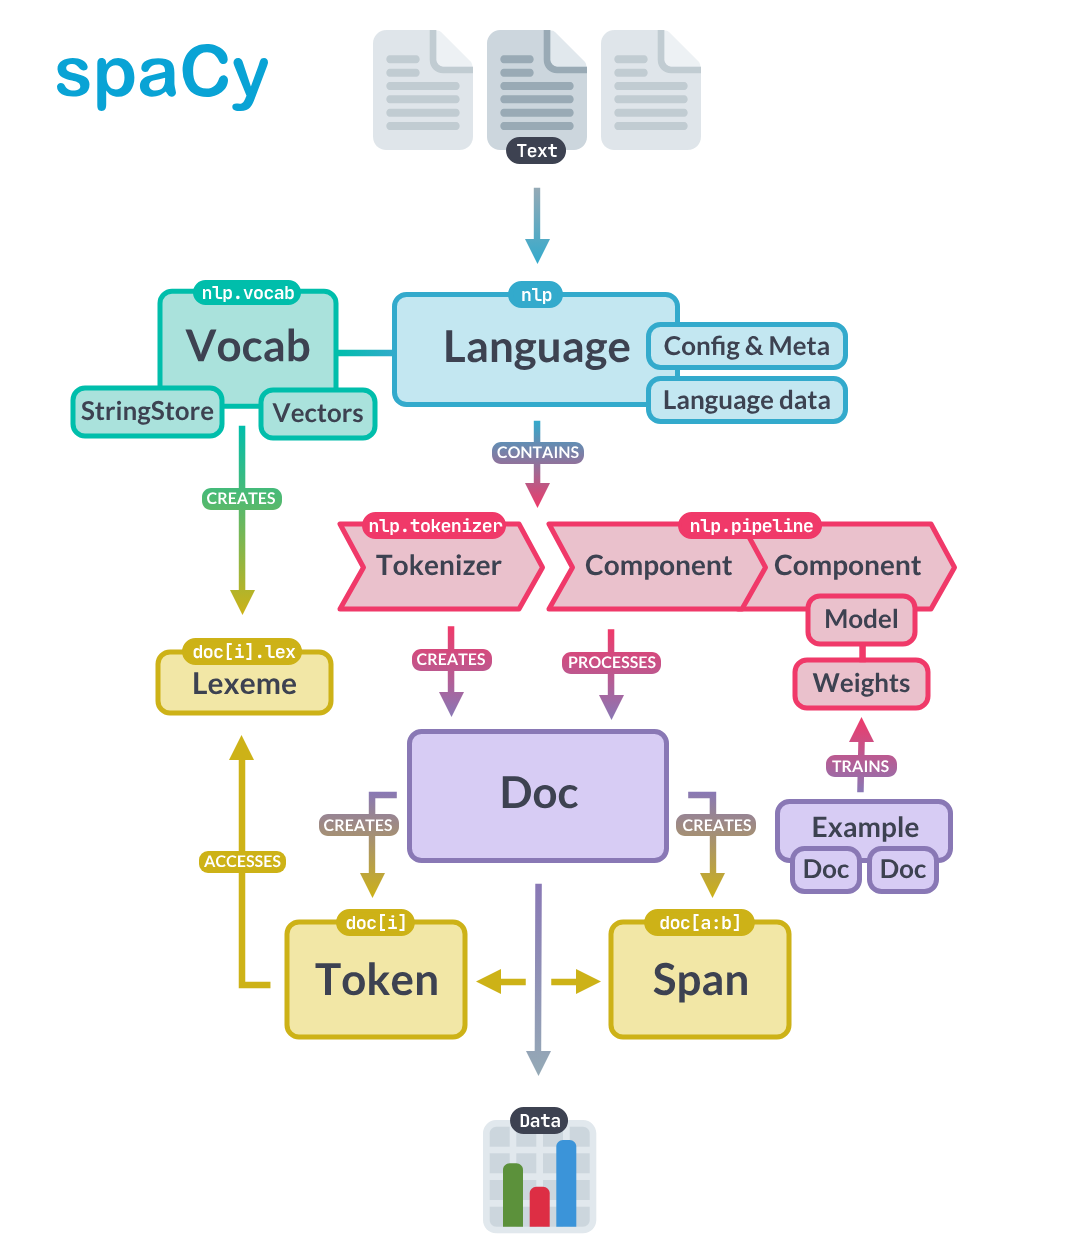